In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn import metrics
import scipy as sp
from scipy.spatial import distance_matrix

import pdb

from diffusion_functions import *
from semi_supervised_manifold_learning import *
from animate_diffusion import animate_diffusion

# commands for displaying animations in jupyter notebook
from IPython.display import HTML

%load_ext autoreload
%autoreload 2

# Concentric spheres in increasing dimensions

## Helper functions

In [2]:
def format_axes(ax, titlestring):
    # figure formatting
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.axis('off')
    if not titlestring==None:
        ax.set_title(titlestring)
    return

def plot_label_comparison_colorful(ax, label_vector, data_matrix, titlestring=None):
    threshold = 0 
    label_estimates = label_vector#make_sweep_cut(label_vector, threshold)

    im = ax.scatter(data_matrix[:,0],data_matrix[:,1],c=label_estimates)
    plt.colorbar(im, ax=ax)
    
    format_axes(ax,titlestring)
    return

def plot_label_comparison_binary(ax, label_vector, data_matrix, titlestring=None, 
                                 objective_function = sweep_cut_classification_error):
    
    cut_val, threshold = find_min_sweepcut(label_vector,100,objective_function, orthogonality_constraint = 'auto')
    label_estimates = make_sweep_cut(label_vector, threshold)
    
    classification_error = sweep_cut_classification_error(label_estimates)
    orthogonality_error = np.abs(np.sum(label_estimates)/len(label_estimates))

    im = ax.scatter(data_matrix[:,0],data_matrix[:,1],c=label_estimates)
    plt.colorbar(im, ax=ax)
    
    subtitle = f'\n Threshold = {threshold:.3f}. Cut objective = {cut_val:.3f} \n Class. error = {classification_error:.3f} \n Orthog. error = {orthogonality_error:.3f}'
    format_axes(ax,titlestring+subtitle)
    return

def plot_AUC_hist(AUC_vals, titlestring = None):
    plt.rcParams.update({'font.size': 15})
    # get bin parameters for consistent scaling of both datasets without displaying
    _, first_bins, _ = plt.hist([[v[1] for v in AUC_vals], [v[0] for v in AUC_vals]])
    plt.clf()
    
    fig, ax = plt.subplots(figsize = (6, 5))
    ax.hist([v[1] for v in AUC_vals], bins = first_bins, alpha=0.5, edgecolor = 'black', label = 'graph')
    ax.hist([v[0] for v in AUC_vals], bins = first_bins, alpha=0.5, edgecolor = 'black', label='hypergraph')
#     ax.hist([v[1] for v in AUC_vals], alpha=0.5, edgecolor = 'black', label = 'graph')
#     ax.hist([v[0] for v in AUC_vals], alpha=0.5, edgecolor = 'black', label='hypergraph')
    ax.legend()
    
    # figure formatting 
    ax.set_title(titlestring)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    plt.show()
    return

def compare_ROC_curves(hypergraph_x, graph_x):
    n = len(hypergraph_x)
    labels = np.hstack([np.full(shape=int(n/2),fill_value = -1),np.full(shape=int(n/2),fill_value = 1)])
    
    plt.plot(figsize=(15, 15))
    for x, legend_val in [(graph_x, 'graph'),(hypergraph_x, 'hypergraph')]:
        fpr, tpr, thresholds = metrics.roc_curve(labels, x, pos_label=1)
        plt.plot(fpr, tpr, label = legend_val)
    
    graph_auc_score = metrics.roc_auc_score(labels, graph_x)
    hypergraph_auc_score = metrics.roc_auc_score(labels, hypergraph_x)
    
    plt.legend()
    plt.title('ROC curves \n hyper AUC score = '+str(hypergraph_auc_score)+' \n graph AUC score = '+str(graph_auc_score))
    plt.show()
    return

## Visualization in 2D

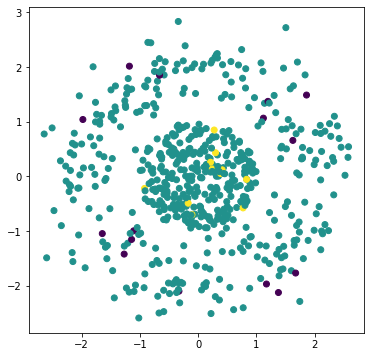

In [3]:
# generate new data
_, data_matrix = generate_concentric_highdim(ambient_dim = 2,verbose = False) #start_theta=np.pi / 5, num_rotations=0.9, verbose=False)
n = data_matrix.shape[0]

num_rand_seeds = int(0.05*n)
x0 = np.full(shape=(n, 1), fill_value=0)
random_seeds = np.random.choice(np.arange(n), size=num_rand_seeds)
x0[random_seeds[random_seeds < n / 2]] = -1
x0[random_seeds[random_seeds > n / 2]] = 1

fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(data_matrix[:, 0], data_matrix[:, 1],c=x0)
plt.show()

## AUC Histograms for varying dimension

Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer


<Figure size 432x288 with 0 Axes>

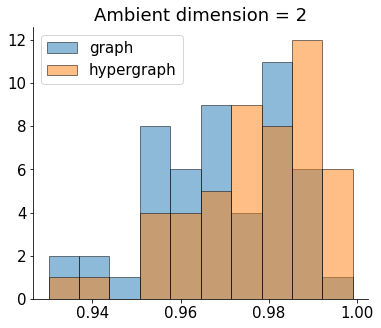

Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer


<Figure size 432x288 with 0 Axes>

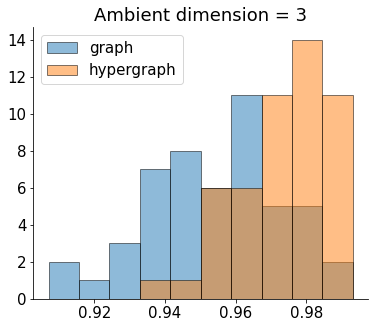

Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer


<Figure size 432x288 with 0 Axes>

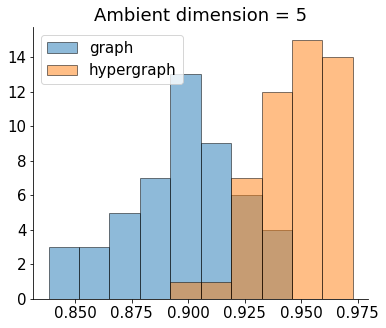

Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer
Using degree regularizer


<Figure size 432x288 with 0 Axes>

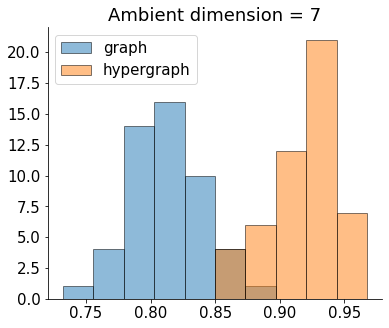

In [6]:
# data generation parameters
r_inner=1
r_outer=2
pts_per_community=300
noise_level=0.4

n = 2*pts_per_community
labels = np.hstack([np.full(shape=int(n/2),fill_value = -1),np.full(shape=int(n/2),fill_value = 1)])

node_weight_method = 'gaussian_to_central_neighbor'

# experimental procedure parameters
k = 5
num_trials = 50
PPR_iterations = 50

for ambient_dim in [2,3,5,7]:
    AUC_vals = []
    for trial in range(num_trials):
        # generate new data
        _, data_matrix = generate_concentric_highdim(ambient_dim=ambient_dim,
                                                     r_inner=r_inner,
                                                     r_outer=r_outer,
                                                     n_pts=pts_per_community,
                                                     noise_level=noise_level,
                                                     verbose=False)

        # build graph/hypergraph
        knn_adj_matrix = build_knn_graph(data_matrix,k)
        knn_hgraph_dict = build_knn_hypergraph(data_matrix,k)
        
        # build hypergraph node weights
        if node_weight_method is not None:
            hypergraph_node_weights = create_node_weights(
                method=node_weight_method,
                data_matrix=data_matrix,
                hgraph_dict=knn_hgraph_dict,
                ord=2
            )
        else:
            hypergraph_node_weights = None
            
        #pdb.set_trace()

        # cluster using PPR vector
        hypergraph_diff_results, graph_diff_results = PPR_knn_clustering(knn_adj_matrix,
                                                                         knn_hgraph_dict, 
                                                                         num_iterations = PPR_iterations,
                                                                         verbose = False,
                                                                         hypergraph_node_weights = hypergraph_node_weights)

        hypergraph_x = hypergraph_diff_results['x_out']
        graph_x = graph_diff_results['x_out']

        graph_auc_score = metrics.roc_auc_score(labels, graph_x)
        hypergraph_auc_score = metrics.roc_auc_score(labels, hypergraph_x)
            
        AUC_vals.append((hypergraph_auc_score, graph_auc_score))
    plot_AUC_hist(AUC_vals,titlestring = f'Ambient dimension = {ambient_dim}') 